# DUMMY VERSION: Sentiment Analysis of DaNewsRoom
This is not the actual sentiments for the investigation but rather a demonstration using dummy data. For the real sentiment analysis script, we refer to the file *bert-sentiment-analysis.ipynb*

Sentiment Analysis using DaNLP's [BERT TONE](https://github.com/alexandrainst/danlp/blob/master/docs/docs/tasks/sentiment_analysis.md) for the Cultural Data Science Project 2022 by @drasbaek and @MinaAlmasi

Using the [DaNewsRoom dataset](https://github.com/alexandrainst/danlp/blob/master/docs/docs/tasks/sentiment_analysis.md)

## Import Packages & Mount Google Drive

In [2]:
# import packages for data import
import gzip 
import pandas as pd 

In [3]:
#progress bar 
!pip -q install tqdm ipywidgets
from tqdm import tqdm
import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00


In [4]:
# mount google drive (if run from google colab)
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
#packages for sentiment analysis
!pip install -q pandas datasets danlp transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.7 MB/s eta 0:00:00


In [6]:
import matplotlib.pyplot as plt #import for plotting
import matplotlib as mpl #import for plotting high res

In [7]:
 #check GPU 
 !nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Data import

In [39]:
#load in the pre-processed dataset 
data = pd.read_excel(io="/content/drive/MyDrive/002 cultural-data-science/dummy-data-danewsroom.xls", sheet_name="dummy_data")

In [40]:
data.head()

,url,archive,title,date,text,domain,year,sentiment
0,tv2.dk/ny-lov-gør-det-nemmere-for-læger-at-anb...,https://web.archive.org/web/20152901321/tv2.dk...,Ny lov gør det nemmere for læger at anbefale m...,1970-08-22 11:00:14.183545,"atienter takket være en ny lov, der trådte i k...",tv2,2015,positive
1,tv2.dk/regeringen-lancerer-ny-strategi-for-at-...,https://web.archive.org/web/2019923123/tv2.dk/...,Regeringen lancerer ny strategi for at bekæmpe...,1970-08-22 11:00:14.183545,ine mål om at bekæmpe klimaforandringer. Strat...,tv2,2019,neutral
2,tv2.dk/københavn-kåret-til-verdens-bedste-by-f...,https://web.archive.org/web/2017/tv2.dk/københ...,København kåret til verdens bedste by for cykl...,1970-08-22 11:00:14.183545,København er blevet kåret til verdens bedste b...,tv2,2017,positive
3,dr.dk/ny-undersøgelse-danskere-er-blandt-de-me...,https://web.archive.org/web/20187821312/dr.dk/...,Ny undersøgelse: Danskere er blandt de mest st...,1970-08-22 11:00:14.183545,En ny undersøgelse fra et internationalt sundh...,dr,2018,negative
4,dr.dk/dr-lancerer-ny-streamingtjeneste-for-børn,https://web.archive.org/web/2015231231/dr.dk/d...,DR lancerer ny streamingtjeneste for børn,1970-08-22 11:00:14.183545,DR har i dag lanceret en ny streamingtjeneste ...,dr,2015,neutral


## Prepping Data
We remove the sentiment column from this dummy data to demonstrate that sentiments can be made

In [41]:
data.drop('sentiment', inplace=True, axis=1)

data.head()

,url,archive,title,date,text,domain,year
0,tv2.dk/ny-lov-gør-det-nemmere-for-læger-at-anb...,https://web.archive.org/web/20152901321/tv2.dk...,Ny lov gør det nemmere for læger at anbefale m...,1970-08-22 11:00:14.183545,"atienter takket være en ny lov, der trådte i k...",tv2,2015
1,tv2.dk/regeringen-lancerer-ny-strategi-for-at-...,https://web.archive.org/web/2019923123/tv2.dk/...,Regeringen lancerer ny strategi for at bekæmpe...,1970-08-22 11:00:14.183545,ine mål om at bekæmpe klimaforandringer. Strat...,tv2,2019
2,tv2.dk/københavn-kåret-til-verdens-bedste-by-f...,https://web.archive.org/web/2017/tv2.dk/københ...,København kåret til verdens bedste by for cykl...,1970-08-22 11:00:14.183545,København er blevet kåret til verdens bedste b...,tv2,2017
3,dr.dk/ny-undersøgelse-danskere-er-blandt-de-me...,https://web.archive.org/web/20187821312/dr.dk/...,Ny undersøgelse: Danskere er blandt de mest st...,1970-08-22 11:00:14.183545,En ny undersøgelse fra et internationalt sundh...,dr,2018
4,dr.dk/dr-lancerer-ny-streamingtjeneste-for-børn,https://web.archive.org/web/2015231231/dr.dk/d...,DR lancerer ny streamingtjeneste for børn,1970-08-22 11:00:14.183545,DR har i dag lanceret en ny streamingtjeneste ...,dr,2015


## BERT TONE CLASSIFICATION

Sentiment Analysis using DaNlP's pretrained bert model:
https://github.com/alexandrainst/danlp/blob/master/docs/docs/tasks/sentiment_analysis.md

### Loading BERT Tone Model

In [11]:
from danlp.models import load_bert_tone_model

#load model 
classifier = load_bert_tone_model()


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.


#### Using BERT for Sentiment Analysis

In [42]:
# using the classifier to get predictions (tone and sentiment)
predictions = [] #define empty list to be appended to in for loop

for i in tqdm(range(len(data))):
  predictions.append(classifier.predict(data["title"][i]))

100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


In [43]:
# using the classifier to get probabilities for the categorisations
probabilities = [] 

for i in tqdm(range(len(data))):
  probabilities.append(classifier.predict_proba(data["title"][i]))

100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


In [44]:
# checking the classes
classifier._classes()

(['positive', 'neutral', 'negative'], ['objective', 'subjective'])

In [45]:
import numpy as np

#make probabilities into seperate columns by splitting up the list of arrays with five values into five columns
probabilities_data = pd.DataFrame([array[0].tolist()+array[1].tolist() for array in probabilities],columns=['positive_probability','neutral_probability','negative_probability','objective_probability', "subjective_probability"])
probabilities_data

# convert BERT sentiment predictions into dataframe
predictions_data = pd.DataFrame(predictions)

#rename polarity into "sentiment"
predictions_data = predictions_data.rename(columns={"polarity": "sentiment"})

#combine all into final dataframe
data = pd.concat([data, predictions_data, probabilities_data], axis=1)

In [46]:
data.head()

,url,archive,title,date,text,domain,year,analytic,sentiment,positive_probability,neutral_probability,negative_probability,objective_probability,subjective_probability
0,tv2.dk/ny-lov-gør-det-nemmere-for-læger-at-anb...,https://web.archive.org/web/20152901321/tv2.dk...,Ny lov gør det nemmere for læger at anbefale m...,1970-08-22 11:00:14.183545,"atienter takket være en ny lov, der trådte i k...",tv2,2015,objective,positive,0.984443,0.013652,0.001906,0.998522,0.001478
1,tv2.dk/regeringen-lancerer-ny-strategi-for-at-...,https://web.archive.org/web/2019923123/tv2.dk/...,Regeringen lancerer ny strategi for at bekæmpe...,1970-08-22 11:00:14.183545,ine mål om at bekæmpe klimaforandringer. Strat...,tv2,2019,objective,positive,0.662127,0.336969,0.000904,0.999555,0.000445
2,tv2.dk/københavn-kåret-til-verdens-bedste-by-f...,https://web.archive.org/web/2017/tv2.dk/københ...,København kåret til verdens bedste by for cykl...,1970-08-22 11:00:14.183545,København er blevet kåret til verdens bedste b...,tv2,2017,objective,positive,0.997390,0.002135,0.000475,0.999881,0.000119
3,dr.dk/ny-undersøgelse-danskere-er-blandt-de-me...,https://web.archive.org/web/20187821312/dr.dk/...,Ny undersøgelse: Danskere er blandt de mest st...,1970-08-22 11:00:14.183545,En ny undersøgelse fra et internationalt sundh...,dr,2018,objective,negative,0.004720,0.211148,0.784132,0.999923,0.000077
4,dr.dk/dr-lancerer-ny-streamingtjeneste-for-børn,https://web.archive.org/web/2015231231/dr.dk/d...,DR lancerer ny streamingtjeneste for børn,1970-08-22 11:00:14.183545,DR har i dag lanceret en ny streamingtjeneste ...,dr,2015,objective,neutral,0.003061,0.996537,0.000402,0.999926,0.000074


## Initial Plotting to Look at BERT's Predictions

### Plotting Sentiment Across Domains

In [47]:
# group sentiment per domain
sentiment_per_domain = data.groupby(["domain", "sentiment"])["sentiment"].count()
sentiment_per_domain

domain        sentiment
bt            negative     2
              neutral      1
dr            negative     1
              neutral      2
ekstrabladet  negative     1
              neutral      2
seoghoer      neutral      3
tv2           positive     3
Name: sentiment, dtype: int64

In [48]:
# make sentiment values (positive, neutral, negative) into columns
sentiment_per_domain = sentiment_per_domain.unstack()
sentiment_per_domain

sentiment,negative,neutral,positive
domain,,,
bt,2.0,1.0,NaN
dr,1.0,2.0,NaN
ekstrabladet,1.0,2.0,NaN
seoghoer,NaN,3.0,NaN
tv2,NaN,NaN,3.0


In [49]:
# convert into dataframe
sentiment_per_domain = pd.DataFrame(sentiment_per_domain)

In [52]:
# replace NaN with 0
sentiment_per_domain = sentiment_per_domain.fillna(0)
sentiment_per_domain

sentiment,negative,neutral,positive
domain,,,
bt,2.0,1.0,0.0
dr,1.0,2.0,0.0
ekstrabladet,1.0,2.0,0.0
seoghoer,0.0,3.0,0.0
tv2,0.0,0.0,3.0


Prepare Data for Stacked Barplot:

In [53]:
# create sum column
sentiment_per_domain["sum"] = sentiment_per_domain["negative"] + sentiment_per_domain["neutral"] + sentiment_per_domain["positive"]

# create proportion column
sentiment_per_domain["proportion_negative"] = sentiment_per_domain["negative"]/sentiment_per_domain["sum"]
sentiment_per_domain["proportion_neutral"] = sentiment_per_domain["neutral"]/sentiment_per_domain["sum"]
sentiment_per_domain["proportion_positive"] = sentiment_per_domain["positive"]/sentiment_per_domain["sum"]

# select only proportion columns for plot 
grouped = sentiment_per_domain[["proportion_negative", "proportion_neutral","proportion_positive"]]

Plot:

<Figure size 750x600 with 0 Axes>

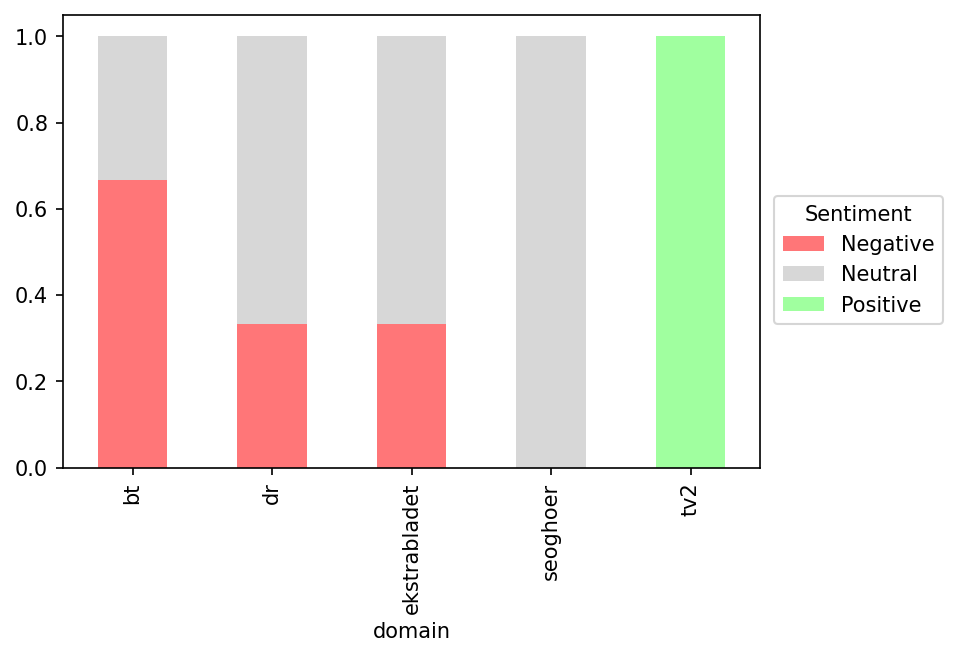

In [54]:
# define plot resolution and size
mpl.rcParams['figure.dpi'] = 150

plt.figure(figsize=(5,4))

# plot values
grouped.plot(kind="bar", stacked="True", color =["#ff7678", "#d7d7d7", "#a0ff9f"])
plt.legend(bbox_to_anchor=(1.02, 0.6), loc="upper left", borderaxespad=0, 
           labels=["Negative", "Neutral", "Positive"], 
           title = "Sentiment")

## Save BERT Data

In [ ]:
data.to_excel("dummy-data-danewsroom.xls")